# Image Augmentation - Applying image transformations to increase small image dataset

In [167]:
# Usual Import Statements
import random
import os
import string
import matplotlib.pyplot as plt
from PIL import Image
from utils import get_file_paths
%matplotlib inline

In [168]:
# Define Transformation Function
def transform(img_path):
    img = Image.open(img_path)
    width, height = img.size
    scale_factor = random.randrange(start=60, stop=95, step=10) / 100
    resized = img.resize((int(width * scale_factor), int(height * scale_factor)), Image.ANTIALIAS)
    new_width, new_height = resized.size
    h_pad = (width - new_width) // 2
    v_pad = (height - new_height) // 2
    result = Image.new(img.mode, (width, height), (0,0,0))
    result.paste(resized,(h_pad, v_pad))
    do_flip = random.choice([True, False])
    if do_flip:
        result = result.transpose(method=Image.FLIP_LEFT_RIGHT)
    return result
    

Image size : 700W 400H 


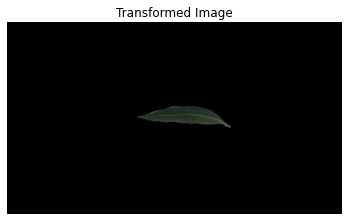

In [169]:
img_file = "C:\\Users\\Asus\\Desktop\\Research\\PreprocessedDatabase\\amrapali\\front\\amrapali_front_35_p.jpg"
flipped = transform(img_file)
plt.axis("off")
plt.title("Transformed Image")
plt.imshow(flipped)
print("Image size : %dW %dH " % flipped.size)

In [170]:
# Apply transformation to increase dataset images
DATASET_DIR = "PreprocessedDatabase"
VARIETIES = ['alphonso','amrapali', 'chausa', 'dusheri', 'langra']
WORKING_DIR = os.getcwd()
OUTPUT_DIR = "Transformed"
print("Transformation begins ...")
for variety in VARIETIES:
    path = os.path.join(WORKING_DIR, DATASET_DIR, variety)
    img_paths = get_file_paths(path, extension=['.jpg'], recursive=True)
    total = len(img_paths)
    print("Transforming %d images in %s variety ..." % (total, variety))
    count = 0
    for img_path in img_paths:
        face = os.path.basename(os.path.dirname(img_path))
        ext = "." + os.path.basename(img_path).split(".")[-1]
        transformed = transform(img_path)
        out_dir =  os.path.join(
            WORKING_DIR, 
            DATASET_DIR, 
            OUTPUT_DIR,
            variety,
            face)
        trans_out_path = os.path.join(out_dir,"_".join([variety,face, "".join(random.choices(string.ascii_lowercase + string.digits, k=20))]) + ext)
        org_out_path = os.path.join(out_dir,"_".join([variety,face, "".join(random.choices(string.ascii_lowercase + string.digits, k=20))]) + ext)
        os.makedirs(out_dir, exist_ok=True)
        # Save transformed and original images
        transformed.save(trans_out_path)
        os.rename(img_path, org_out_path)
        count += 1
        print("%s - %d out of %d completed" % (str.upper(variety), count, total))
    print("%s transformed successfully." % str.upper(variety))
print("Transformation completed!")

Transformation begins ...
Transforming 88 images in alphonso variety ...
ALPHONSO - 1 out of 88 completed
ALPHONSO - 2 out of 88 completed
ALPHONSO - 3 out of 88 completed
ALPHONSO - 4 out of 88 completed
ALPHONSO - 5 out of 88 completed
ALPHONSO - 6 out of 88 completed
ALPHONSO - 7 out of 88 completed
ALPHONSO - 8 out of 88 completed
ALPHONSO - 9 out of 88 completed
ALPHONSO - 10 out of 88 completed
ALPHONSO - 11 out of 88 completed
ALPHONSO - 12 out of 88 completed
ALPHONSO - 13 out of 88 completed
ALPHONSO - 14 out of 88 completed
ALPHONSO - 15 out of 88 completed
ALPHONSO - 16 out of 88 completed
ALPHONSO - 17 out of 88 completed
ALPHONSO - 18 out of 88 completed
ALPHONSO - 19 out of 88 completed
ALPHONSO - 20 out of 88 completed
ALPHONSO - 21 out of 88 completed
ALPHONSO - 22 out of 88 completed
ALPHONSO - 23 out of 88 completed
ALPHONSO - 24 out of 88 completed
ALPHONSO - 25 out of 88 completed
ALPHONSO - 26 out of 88 completed
ALPHONSO - 27 out of 88 completed
ALPHONSO - 28 out 